In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
streamData = pd.read_csv('cublas_stream_times.p100.csv', skipinitialspace=True)
batchData = pd.read_csv('cublas_batch_times.p100.csv', skipinitialspace=True)

In [59]:
print streamData.columns
print batchData.columns

Index([u'dim', u'batch_count', u'sec_per_dgemm', u'Unnamed: 3'], dtype='object')
Index([u'dim', u'batch_count', u'sec_per_dgemm', u'Unnamed: 3'], dtype='object')


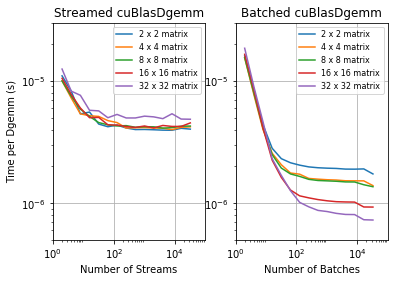

In [63]:
plt.figure(1)

xlabels = ('Number of Streams', 'Number of Batches')
titles = ('Streamed cuBlasDgemm', 'Batched cuBlasDgemm')

for i, D in enumerate([streamData, batchData]):
    plt.subplot(1,2,i+1)
    for dim in [2,4,8,16,32]:
        subset = D[(D['dim'] == dim) & (D['batch_count'] > 1)]
        xvals = subset['batch_count']
        yvals = subset['sec_per_dgemm']
        label = '{} x {} matrix'.format(dim, dim)
        plt.loglog(xvals, yvals, label=label, basex=10, basey=10)
        plt.legend(loc=1, fontsize=8)
        plt.title(titles[i])
        plt.ylim(5e-7,3e-5)
        plt.xlim(1,1e5)
        if i == 0:
            plt.ylabel('Time per Dgemm (s)')
        plt.xlabel(xlabels[i])
        plt.grid(True)
plt.show()